# Behavior Analysis of Hydra

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import time

## 1. Coordinates of Hypostone and Peduncle

In [17]:
# load contents from the .csv files

# data1_ = []; data2_ = []; data3_= []; 
datas = [];

# with open('data/testpoke4DeepCut_resnet50_testpoke4Mar14shuffle1_21000.csv', 'r') as f:

filenames = ['./data/hy78clip1DeepCut_resnet50_clip1Mar15shuffle1_57000.csv',\
            './data/hy78clip2DeepCut_resnet50_clip2Mar15shuffle1_172000.csv',\
            './data/hy78clip3DeepCut_resnet50_clip3Mar15shuffle1_210000.csv',\
            './data/hy78clip5DeepCut_resnet50_clip5Mar15shuffle1_42000.csv',\
            './data/hy78clip6DeepCut_resnet50_clip6Mar15shuffle1_28000.csv',\
            './data/hy78clip7DeepCut_resnet50_clip7Mar15shuffle1_21000.csv']

for filename in filenames:

    data = []
    
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        for item in reader:
            if reader.line_num == 1:
                continue
            data.append(item)

    del data[0:2]
    
    
    
    data_ = np.double(np.array(data))
    
    for j in range(len(data_)):
        if data_[j,3] < 0.9 or data_[j,3] < 0.9:
            data_[j, :] = None
    
    data_ = np.delete(data_, [0,3,6], axis=1)
    
    datas.append(np.array(data_))

In [18]:
length = np.max([len(datas[j]) for j in range(len(datas))])
length2 = np.min([len(datas[j]) for j in range(len(datas))])
time = np.arange(0, length2)/5

dataset = np.zeros((length2, len(datas)*4))

for j in range(len(datas)):
    dataset[:,j*4:(j+1)*4] = datas[j][0:length2]

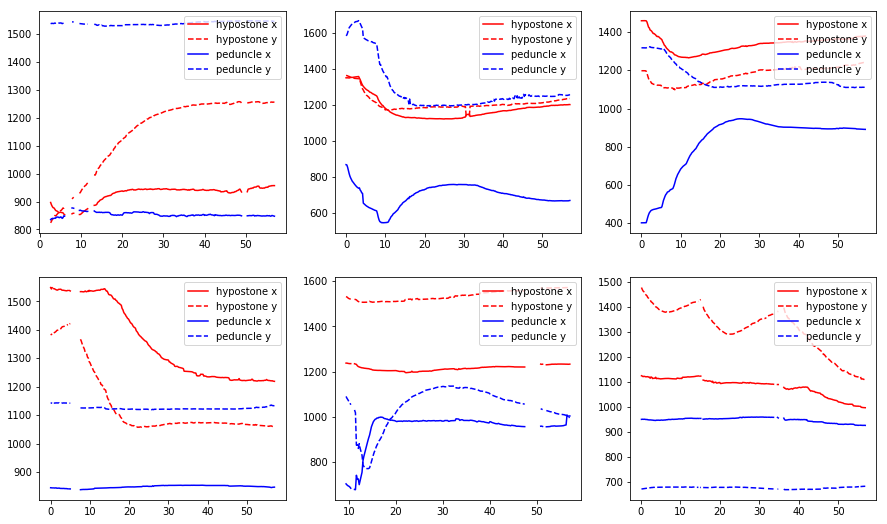

In [21]:
# plot coordinates
plt.figure(figsize = (15,9))

for j in range(len(datas)):
    plt.subplot(2,3,j+1)
    plt.plot(time, dataset[:,j*4], 'r-', label='hypostone x')
    plt.plot(time, dataset[:,j*4+1], 'r--', label='hypostone y')
    plt.plot(time, dataset[:,j*4+2], 'b-', label='peduncle x')
    plt.plot(time, dataset[:,j*4+3], 'b--', label='peduncle y')
    plt.legend(loc = 'upper right')

plt.show()


## 2. Roundness

In [44]:
import pandas as pd

In [67]:
roundness_set = []

nclips = 7

for j in range(nclips):
    reader = pd.read_csv('data/hy78clip'+str(j+1)+'roidata.csv')
    roundness = np.array(np.double(reader['Unnamed: 19'][9:]))
    roundness_set.append(roundness)

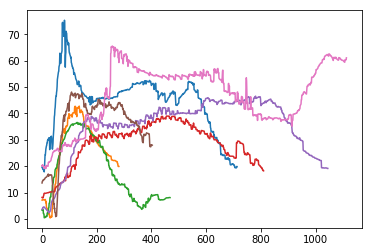

In [157]:
plt.figure()
for j in range(nclips):
    plt.plot(roundness_set[j])

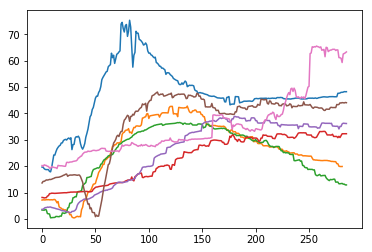

In [121]:
plt.figure()
for j in range(nclips):
    plt.plot(roundness_set[j][0:length2])

In [153]:
length = np.max([len(roundness_set[j]) for j in range(len(roundness_set))])
length2 = np.min([len(roundness_set[j]) for j in range(len(roundness_set))])

datamat= np.zeros((length2, len(roundness_set)))

for j in range(nclips):
    datamat[:,j] = roundness_set[j][0:length2]

In [154]:
time = np.arange(0, length2)/5

In [155]:
datamat -= np.mean(datamat, axis = 0)

[u,s,vh] = np.linalg.svd(datamat, full_matrices=False)

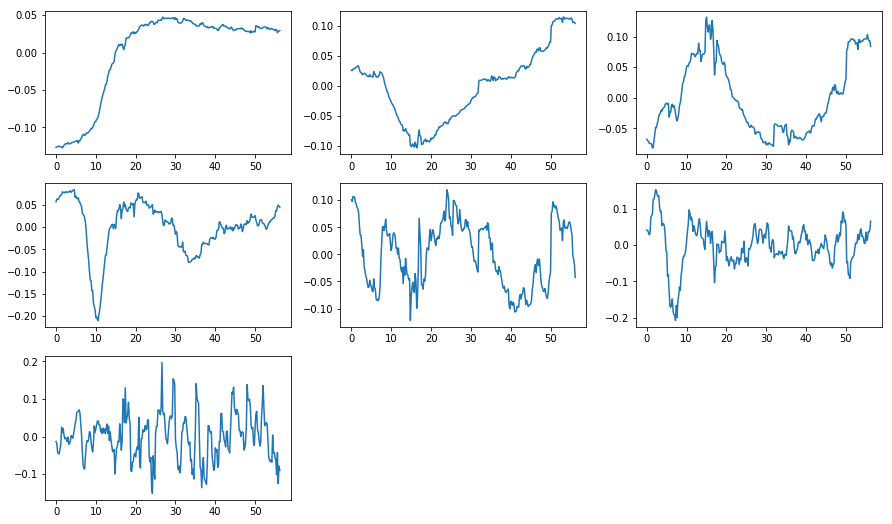

In [156]:

plt.figure(figsize=(15,9))
for j in range(nclips):
    plt.subplot(3,3,j+1)
    plt.plot(time, u[:,j])

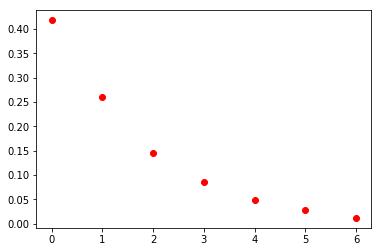

In [133]:
plt.plot(s/sum(s), 'ro')

In [130]:
s.shape

(7,)